In [19]:
## 🔗 SQL Analysis (Using SQLite)
import pandas as pd
import sqlite3

df = pd.read_csv("C:/Users/sivanisree/Documents/job_postings.csv", encoding='ISO-8859-1')
conn = sqlite3.connect("job_data.db")
df.to_sql("jobs", conn, if_exists="replace", index=False)

9919

In [20]:
##total job by country
query = """
SELECT Location, COUNT(*) as job_count
FROM jobs
GROUP BY Location
ORDER BY job_count DESC
LIMIT 15
"""
pd.read_sql(query, conn)

,Location,job_count
0,"Bangalore, India",642
1,None,411
2,India,320
3,"Chennai, India",305
4,"Indiana, United States",239
5,Germany,229
6,"Campinas, Brazil",212
7,"Cz_stochowa, Poland",207
8,"Hanau, Germany",197
9,"Budapest, Hungary",196


In [21]:
## top hiring companies:
query = """
SELECT [Website Domain] as company, COUNT(*) as job_count
FROM jobs
GROUP BY [Website Domain]
ORDER BY job_count DESC
LIMIT 15
"""
pd.read_sql(query, conn)

,company,job_count
0,bosch.com,5470
1,zf.com,3374
2,heraeus.com,457
3,auchan-retail.com,291
4,contentful.com,243
5,agorapulse.com,45
6,gruppe.schwarz,28
7,conceptboard.com,11


In [22]:
## job mentioning python in description
query = """
SELECT * FROM jobs
WHERE LOWER(Description) LIKE '%python%'
LIMIT 10
"""
pd.read_sql(query, conn)

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,None,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
1,zf.com,None,AUTOSAR Integrator,https://jobs.zf.com/job/Chennai-AUTOSAR-Integr...,2024-07-22T20:14:40Z,2024-08-15T19:43:48Z,"Chennai, India","[{""city"":""Chennai"",""state"":null,""zip_code"":nul...",None,non_manager,...,**Become our next FutureStarter**\n\nLocation:...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",None,closed,en,2024-08-17T19:49:55Z,49-3023.00,"Installation, Maintenance, and Repair",Automotive Service Technicians and Mechanics
2,bosch.com,None,Working Student in Security Trainings and Meth...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-04-11T22:16:19Z,2024-06-29T15:46:23Z,Germany,"[{""city"":null,""state"":null,""zip_code"":null,""co...","internship, military_and_protective_services",non_manager,...,**Working Student in Security Trainings and Me...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",part time,closed,en,2024-07-01T15:51:32Z,25-3041.00,Educational Instruction and Library,Tutors
3,bosch.com,None,Assistant / Deputy Manager - System engineerin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-04-06T08:32:14Z,2024-06-07T14:46:25Z,"Bangalore, India","[{""city"":""Bangalore"",""state"":null,""zip_code"":n...",support,manager,...,**Assistant / Deputy Manager - System engineer...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-06-09T20:26:27Z,49-1011.00,"Installation, Maintenance, and Repair","First-Line Supervisors of Mechanics, Installer..."
4,bosch.com,None,DevOps Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-15T15:38:48Z,2024-06-06T20:22:39Z,"Budapest, Hungary","[{""city"":""Budapest"",""state"":null,""zip_code"":nu...","engineering, information_technology",non_manager,...,**DevOps Engineer**\n\n\n* Full-time\n* Legal ...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-06-09T06:15:50Z,15-1252.00,Computer and Mathematical,Software Developers
5,bosch.com,None,Werkstudent im Bereich AI/ LLM Metaverse Engin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-08T01:46:44Z,2024-06-23T16:22:30Z,Germany,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, internship",non_manager,...,**Werkstudent im Bereich AI/ LLM Metaverse Eng...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",part time,closed,de,2024-06-25T16:27:52Z,25-1022.00,Educational Instruction and Library,"Mathematical Science Teachers, Postsecondary"
6,bosch.com,None,Python_Developer_BAN _ETC2,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-28T18:20:09Z,2024-04-12T12:54:20Z,"Bangalore, India","[{""city"":""Bangalore"",""state"":null,""zip_code"":n...",software_development,non_manager,...,**Python\_Developer\_BAN \_ETC2**\n\n\n* Full-...,None,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-04-14T13:11:31Z,43-9021.00,Office and Administrative Support,Data Entry Keyers
7,bosch.com,None,Internship in Software DevOps Engineering,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-12T20:30:43Z,2024-07-29T04:37:25Z,Germany,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, information_technology, internship",non_manager,...,**Internship in Soft

In [26]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("job_data.db")

# SQL query to count jobs by country
query = """
SELECT 
    TRIM(SUBSTR(Location, INSTR(Location, ',') + 1)) AS country,
    COUNT(*) AS job_count
FROM jobs
WHERE Location LIKE '%,%'
GROUP BY country
ORDER BY job_count DESC
LIMIT 10;
"""

# Run the query and store the result in df_sql_country
df_sql_country = pd.read_sql_query(query, conn)

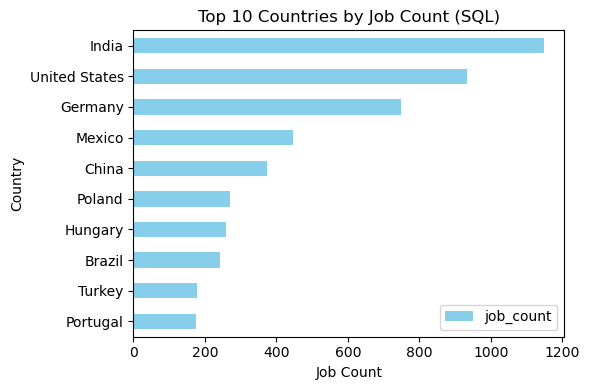

In [27]:
import matplotlib.pyplot as plt

df_sql_country.plot(kind="barh", x="country", y="job_count", color="skyblue", figsize=(6,4))
plt.title("Top 10 Countries by Job Count (SQL)")
plt.xlabel("Job Count")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()